#  Data exploration passenger survival data from the Titanic data set from Kaggle

#### Initial steps to build up a machine learning model to predict passenger survival on the Titanic

## `Step 1: Get the data`

In [7]:
import pandas as pd
%matplotlib inline 
df = pd.read_csv('../data/train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
!ls -l ../data

total 120
-rw-rw-r-- 1 varo varo 61194 Sep  1 14:39 train.csv
-rw-rw-r-- 1 varo varo 58858 Sep 17 13:37 train_featured.csv


## `Step 2: Exploratory data analysis`

__Identify classifiers that may be of relevance in influencing the accuracy, precision, recall and F1-score values.__

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


2.1. *Calculate the number of surviving/non-surviving passengers and display it as a bar plot.* 

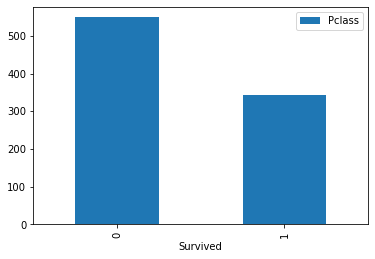

In [12]:
df2 = df.groupby(['Survived'])[['Pclass']].count() 
df2.plot.bar()

2.2. *Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.*

In [13]:
first = df.groupby(['Survived', 'Pclass'])['Pclass'].count().unstack()[1] 
round(first[1]/ first.sum(), 3) 

0.63

2.3. *Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.*

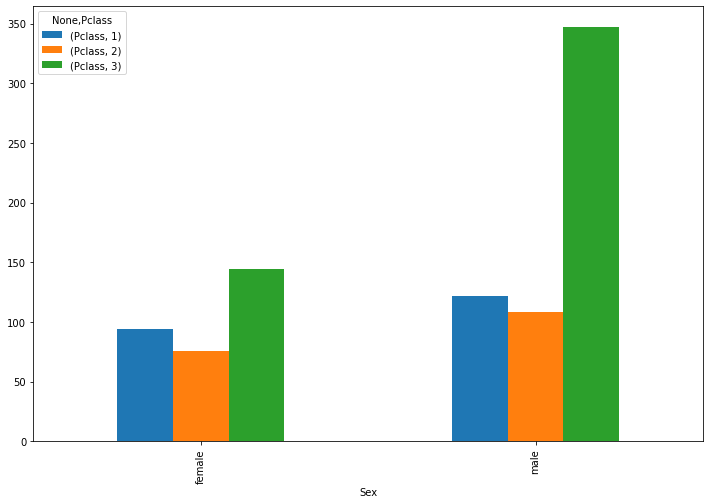

In [14]:
sex_pclass = df.groupby(['Sex', 'Pclass'])[['Pclass']].count().unstack()
sex_pclass.plot.bar(figsize=(12, 8))

2.4. *Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.*

Text(0.5, 1.0, 'Died')

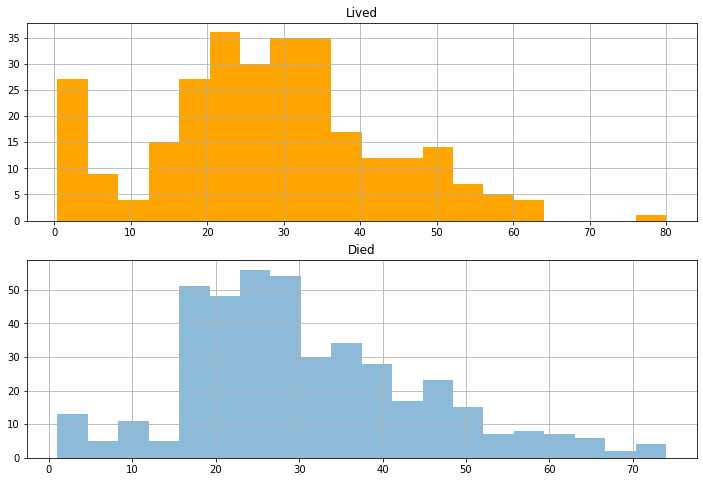

In [15]:
from matplotlib import pyplot as plt

plt.subplot(2, 1, 1)  
age_surviving = df[df['Survived'] == 1]['Age'] # get the values of survivals and 
age_surviving.hist(bins = 20, color = 'Orange', figsize = (12, 8))
plt.title('Lived')

plt.subplot(2, 1, 2)
age_dead = df[df['Survived'] == 0]['Age']
age_dead.hist(bins = 20, alpha = 0.5)    
plt.title('Died')

2.5. *Calculate the average age for survived and drowned passengers separately.*

In [16]:
alive = df.groupby(['Survived'])[['Age']].mean()
alive

,Age
Survived,
0,30.626179
1,28.343690


2.6. *Replace missing age values by the mean age.*

In [17]:
df['age_fixed'] = df['Age'].fillna(df['Age'].mean())

2.7. *Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.*

In [18]:
df.groupby(['Survived', 'Sex', 'Pclass'])[['Pclass']].count()

Pclass
Survived Sex    Pclass        
0        female 1            3
                2            6
                3           72
         male   1           77
                2           91
                3          300
1        female 1           91
                2           70
                3           72
         male   1           45
                2           17
                3           47